In [1]:
from DataUtils import *
import pandas as pd
import matplotlib.pyplot as plt

labels = ['text','label']

# Reading data set
    # Two Datasets
        1. Kaggle
        2. Reserach Articles News
        3. Data (Some news data)
        4. News data set
        5. Politifacts data set
        6. Train and test data set
    # Drop irrelevant columns

In [2]:
kaggle_data = getKaggleNewsDataSet()
print(kaggle_data.head())

research_data = getReserachArticleNewsDataSet()
research_data.head()

                                               title  \
0        Nader Talebzadeh: They Planned and He Plans   
1       Boiler Room EP #109 – It’s a Wonderfull Life   
2  Former U.S. President Jimmy Carter says would ...   
3  Germany's Merkel to name aide Altmaier as stan...   
4  Zimbabwe's Mnangagwa drops hint military chief...   

                                                text       subject  \
0   Photo illustration by Patrick Henningsen@21WI...       US_News   
1  Tune in to the Alternate Current Radio Network...       US_News   
2  NEW YORK (Reuters) - Former U.S. President Jim...  politicsNews   
3  BERLIN (Reuters) - Chancellor Angela Merkel s ...     worldnews   
4  HARARE (Reuters) - Zimbabwean President Emmers...     worldnews   

                  date  label  
0        March 6, 2017      0  
1         May 19, 2017      0  
2    October 22, 2017       1  
3  September 29, 2017       1  
4   December 19, 2017       1  


,text,label
0,Iranian Foreign Minister Mohammad Javad Zar...,1
1,Jesús Eugenio Ramos Rodríguez was slain at a...,1
2,America has a dark secret that no one wants...,0
3,Senator Ted Cruz joined Sean Hannity Tuesday...,0
4,According to a Christian News Website Hillar...,0


# Visualizing data set

## Kaggle : How many articles per subject?

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


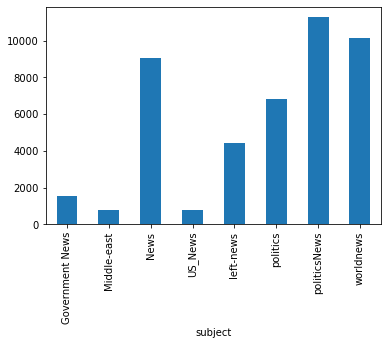

In [3]:
print(kaggle_data.groupby(['subject'])['text'].count())
kaggle_data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

## Kaggle : How many fake and real articles?

label
0    23481
1    21417
Name: text, dtype: int64


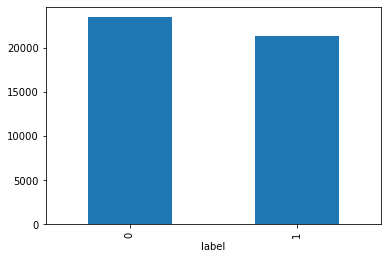

In [4]:
print(kaggle_data.groupby(['label'])['text'].count())
kaggle_data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

## Research Article News : How many fake and real articles?

label
0    90
1    80
Name: text, dtype: int64


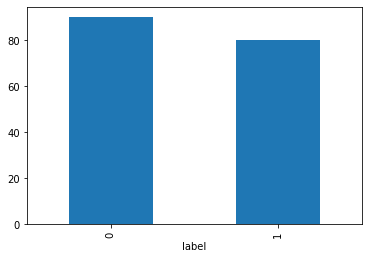

In [5]:
print(research_data.groupby(['label'])['text'].count())
research_data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

## GET TEXT COLUMNS DF

In [6]:
kaggle_fake=kaggle_data[kaggle_data["label"]==0]
kaggle_real=kaggle_data[kaggle_data["label"]==1]

research_fake=research_data[research_data["label"]==0]
research_real=research_data[research_data["label"]==1]

## Kaggel : Word Cloud

### Fake

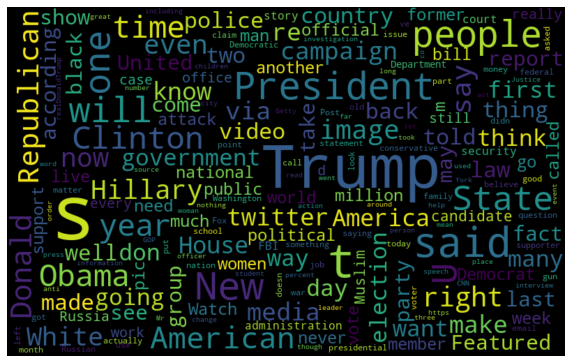

In [7]:
word_cloud(kaggle_fake, "text")

### Real

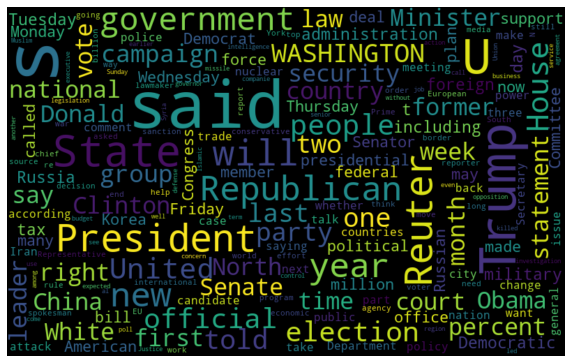

In [8]:
word_cloud(kaggle_real, "text")

## Research News : Word Cloud

### Fake

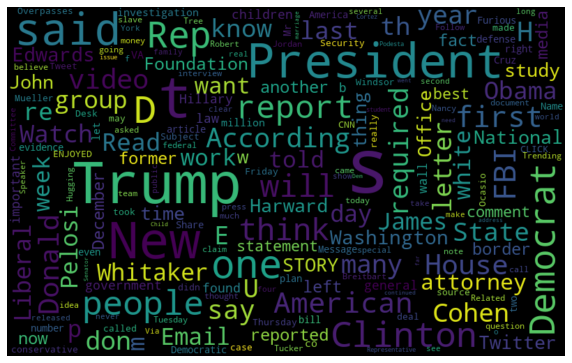

In [9]:
word_cloud(research_fake, "text")

### Real

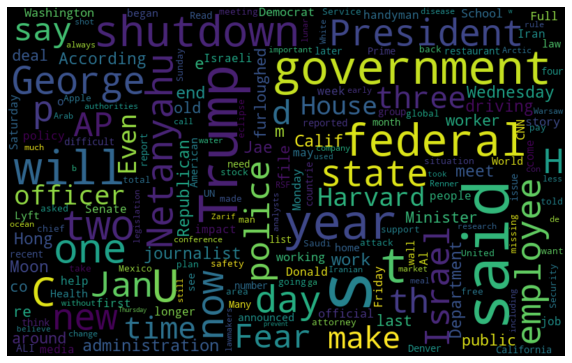

In [10]:
word_cloud(research_real, "text")

## Kaggel Word counts and frequency

### Fake

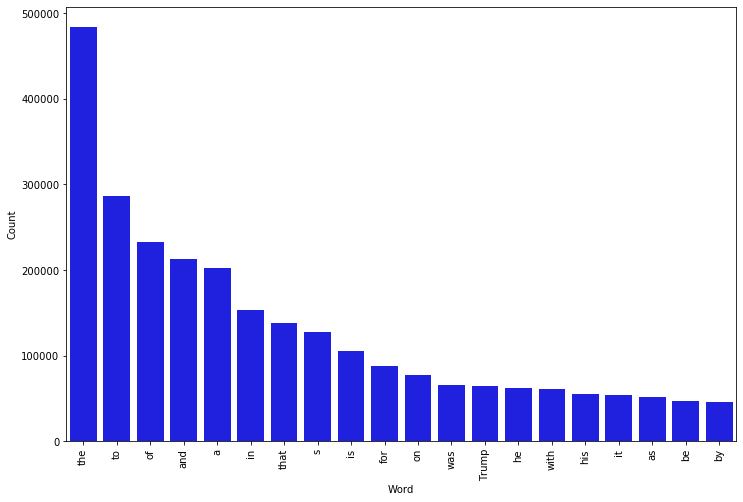

In [11]:
frequency(kaggle_fake, "text", 20)

### Real

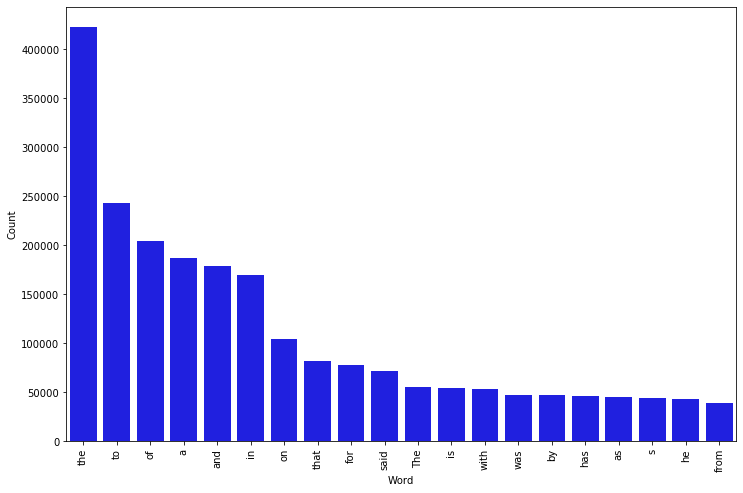

In [12]:
frequency(kaggle_real, "text", 20)

## Research Word counts and frequency

### Fake

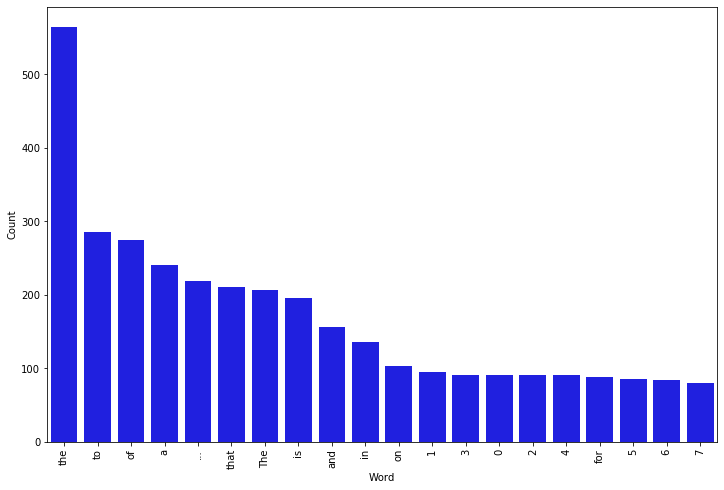

In [13]:
frequency(research_fake, "text", 20)

### Real

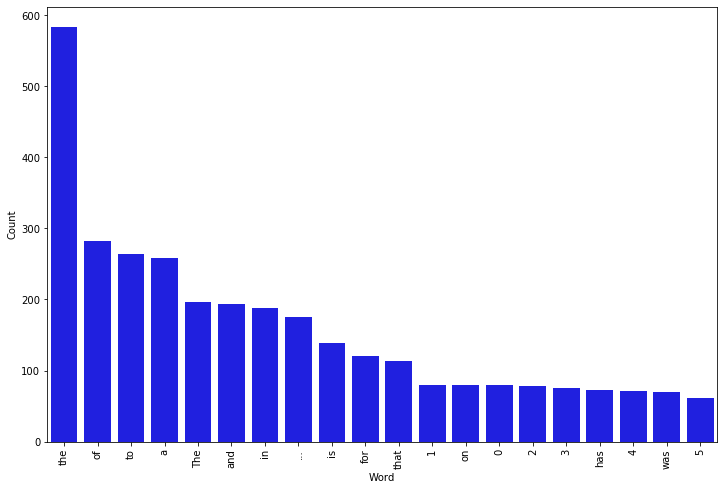

In [14]:
frequency(research_real, "text", 20)

## Data Dataset

In [15]:
dataset = pd.read_csv("./data/data.csv")
dataset["text"] = dataset["Headline"] + dataset["Body"]
dataset.sample(frac = 1) #Shuffle 100%
dataset["label"] = dataset["Label"]
dataset = dataset.loc[:,['text','label']]
dataset = dataset.dropna()


# def wordpre(text):
#     text = text.lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     return text

# dataset.head()

# dataset['text']=dataset['text'].apply(wordpre)


## News Dataset

In [16]:
newsdataset = pd.read_csv("./data/news.csv")

newsdataset["text"] = newsdataset["title"] + newsdataset["text"]
newsdataset.sample(frac = 1) #Shuffle 100%

newsdataset.label[newsdataset.label == 'REAL'] = 1
newsdataset.label[newsdataset.label == 'FAKE'] = 0

newsdataset["text"] = newsdataset["text"].astype(str)
newsdataset['label'] = newsdataset['label'].astype(int) 

newsdataset = newsdataset.loc[:,['text','label']]
newsdataset = newsdataset.dropna()

<ipython-input-16-2e4810e3285a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsdataset.label[newsdataset.label == 'REAL'] = 1
<ipython-input-16-2e4810e3285a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsdataset.label[newsdataset.label == 'FAKE'] = 0


## Politifact Dataset

In [17]:
politifact_real = pd.read_csv("./data/politifact_real.csv")
politifact_fake = pd.read_csv("./data/politifact_fake.csv")
politifact_real['label']= 1
politifact_fake['label']= 0
politifact = pd.concat([politifact_real, politifact_fake])
politifact["text"] = politifact["title"]

politifact["text"] = politifact["text"].astype(str)
politifact['label'] = politifact['label'].astype(int) 

politifact.sample(frac = 1) #Shuffle 100%
politifact = politifact.loc[:,['text','label']]

print(politifact.head())

                                                text  label
0        National Federation of Independent Business      1
1                        comments in Fayetteville NC      1
2  Romney makes pitch, hoping to close deal : Ele...      1
3  Democratic Leaders Say House Democrats Are Uni...      1
4    Budget of the United States Government, FY 2008      1


## Train Dataset

In [18]:
traindataset = pd.read_csv("./data/train.csv")
traindataset["text"] = traindataset["title"] + traindataset["text"]
traindataset.sample(frac = 1) #Shuffle 100%

traindataset["text"] = traindataset["text"].astype(str)
traindataset['label'] = traindataset['label'].astype(int) 

traindataset = traindataset.loc[:,['text','label']]
traindataset = traindataset.dropna()

## Data Cleaning

### Kaggle - Drop irrelevant columns 

In [19]:
kaggle_data["Article"] = kaggle_data["title"] + kaggle_data["text"]
kaggle_data.drop(['title', 'subject', 'date', 'text'],axis=1,inplace=True)

kaggle_data["text"] = kaggle_data["Article"]
kaggle_data.drop(['Article'],axis=1,inplace=True)
print(kaggle_data.head())

   label                                               text
0      0  Nader Talebzadeh: They Planned and He Plans Ph...
1      0  Boiler Room EP #109 – It’s a Wonderfull LifeTu...
2      1  Former U.S. President Jimmy Carter says would ...
3      1  Germany's Merkel to name aide Altmaier as stan...
4      1  Zimbabwe's Mnangagwa drops hint military chief...


### Remove Stopwords and Punctuations

In [20]:
clean_data(kaggle_data, ["text"])
clean_data(research_data, ["text"])
clean_data(dataset, ["text"])
clean_data(newsdataset, ["text"])
clean_data(politifact, ["text"])
clean_data(traindataset, ["text"])

## Combine both dataset

In [21]:
all_data = kaggle_data.append(research_data, ignore_index=True, sort=False)
all_data = all_data.append(dataset, ignore_index=True, sort=False)
all_data = all_data.append(newsdataset, ignore_index=True, sort=False)
all_data = all_data.append(politifact, ignore_index=True, sort=False)
all_data = all_data.append(traindataset, ignore_index=True, sort=False)
all_data.head()

,label,text
0,0,nader talebzadeh planned plan photo illustrati...
1,0,boiler room ep 109 wonderfull lifetune alterna...
2,1,former u president jimmy carter say would trav...
3,1,germany merkel name aide altmaier standin fina...
4,1,zimbabwe mnangagwa drop hint military chief se...


### Data visualization after cleanup

label
0    39674
1    37573
Name: text, dtype: int64


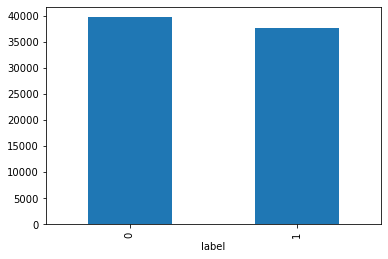

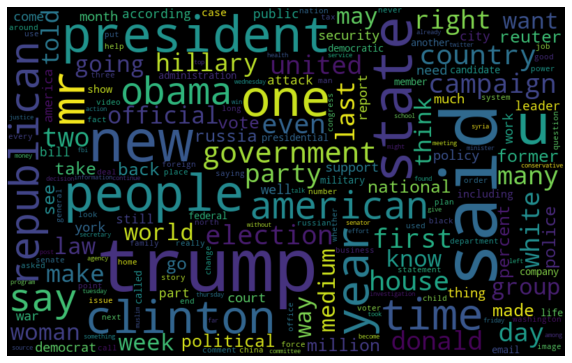

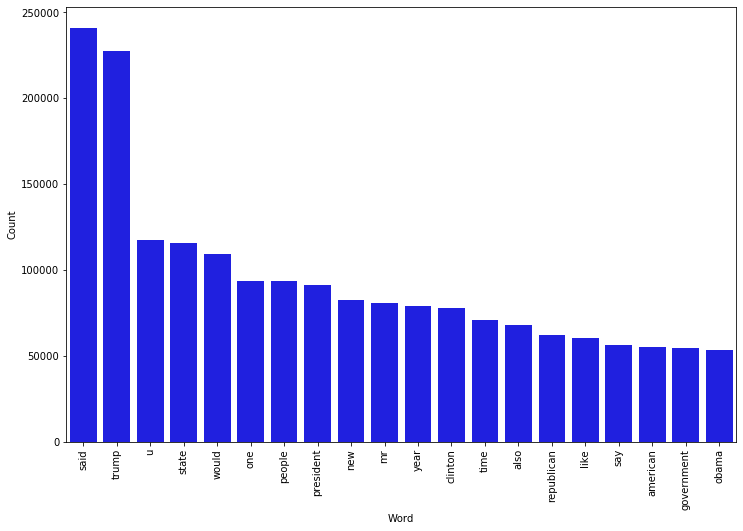

In [22]:
print(all_data.groupby(['label'])['text'].count())
all_data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

word_cloud(all_data, "text")

frequency(all_data, "text", 20)

### Split to train, test

In [23]:
# train_data, test_data, train_labels, test_labels = split_data(kaggle_data, labels)
train_data, test_data, train_labels, test_labels = train_test_split(all_data['text'].values,
                                                                    all_data['label'].values,
                                                                    test_size=0.2, random_state=42, shuffle="false")

# print("X_train shape: {}".format(train_data))
# print("X_test shape: {}".format(test_data))
# print("y_train shape: {}".format(train_labels))
# print("y_test shape: {}".format(test_labels))


# Logistic regression:

In [24]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns    

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
LRModel = pipe.fit(train_data, train_labels)
print(train_labels)
# Accuracy
prediction = LRModel.predict(test_data)
LRModel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(LRModel_accuracy))
cm = metrics.confusion_matrix(test_labels, prediction)

[0 0 1 ... 1 0 1]
accuracy: 86.93%


In [25]:
#Checking the performance of our model
test_labels=test_labels.astype('int')

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      7908
           1       0.89      0.84      0.86      7542

    accuracy                           0.87     15450
   macro avg       0.87      0.87      0.87     15450
weighted avg       0.87      0.87      0.87     15450

[[7099  809]
 [1210 6332]]


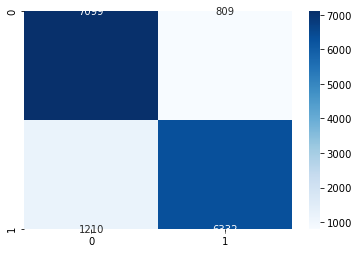

In [26]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

## Decision Tree Classifier:

In [27]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
DTCModel = pipe.fit(train_data, train_labels)
# Accuracy
prediction = DTCModel.predict(test_data)

DTCModel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(DTCModel_accuracy))

cm = metrics.confusion_matrix(test_labels, prediction)

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))


accuracy: 83.4%
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      7908
           1       0.82      0.85      0.83      7542

    accuracy                           0.83     15450
   macro avg       0.83      0.83      0.83     15450
weighted avg       0.83      0.83      0.83     15450

[[6499 1409]
 [1156 6386]]


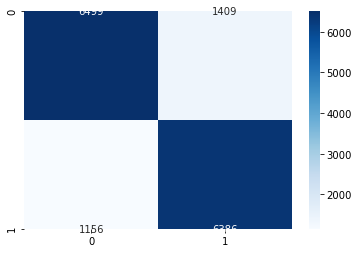

In [28]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

In [29]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# pipe = Pipeline([('vect', CountVectorizer()),
#                  ('tfidf', TfidfTransformer()),
#                  ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
# # Fitting the model
# RFCModel = pipe.fit(train_data, train_labels)
# # Accuracy
# prediction = RFCModel.predict(test_data)

# RFCModel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
# print("accuracy: {}%".format(RFCModel_accuracy))
      
# cm = metrics.confusion_matrix(test_labels, prediction)

# print(classification_report(test_labels, prediction))
# print(confusion_matrix(test_labels, prediction))


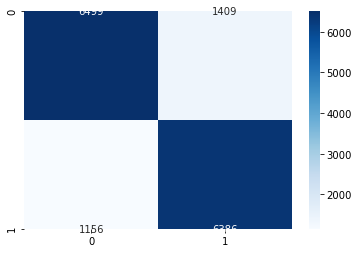

In [30]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

In [31]:
from sklearn.linear_model import SGDClassifier

#Stochastic Gradient Descent
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])

# Fitting the model
SGDmodel = pipe.fit(train_data, train_labels)
# Accuracy
prediction = SGDmodel.predict(test_data)

SGDmodel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(SGDmodel_accuracy))

cm = metrics.confusion_matrix(test_labels, prediction)

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))


accuracy: 86.23%
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7908
           1       0.89      0.82      0.85      7542

    accuracy                           0.86     15450
   macro avg       0.87      0.86      0.86     15450
weighted avg       0.86      0.86      0.86     15450

[[7157  751]
 [1376 6166]]


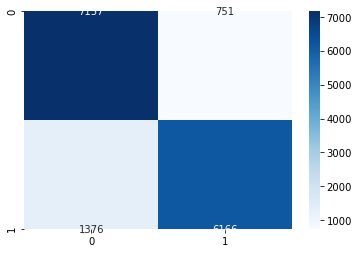

In [32]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

In [33]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])


# Fitting the model
GBCmodel = pipe.fit(train_data, train_labels)
# Accuracy
prediction = GBCmodel.predict(test_data)

GBCmodel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(GBCmodel_accuracy))

cm = metrics.confusion_matrix(test_labels, prediction)

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))

accuracy: 78.72%
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      7908
           1       0.98      0.58      0.73      7542

    accuracy                           0.79     15450
   macro avg       0.84      0.78      0.78     15450
weighted avg       0.84      0.79      0.78     15450

[[7819   89]
 [3199 4343]]


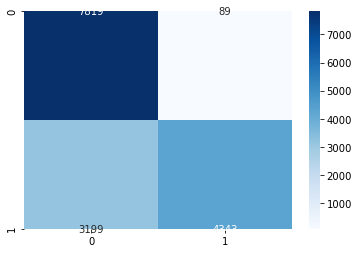

In [34]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

In [35]:
#########XGBClassifier
# from xgboost import XGBClassifier
# pipe = Pipeline([('vect', CountVectorizer()),
#                  ('tfidf', TfidfTransformer()),
#                  ('model', XGBClassifier(loss = 'deviance',
#                                                    learning_rate = 0.01,
#                                                    n_estimators = 10,
#                                                    max_depth = 5,
#                                                    random_state=2020))])


# # Fitting the model
# xgboostmodel = pipe.fit(train_data, train_labels)
# # Accuracy
# prediction = xgboostmodel.predict(test_data)
# print("accuracy: {}%".format(round(accuracy_score(test_labels, prediction)*100,2)))

# cm = metrics.confusion_matrix(test_labels, prediction)

# print(classification_report(test_labels, prediction))
# print(confusion_matrix(test_labels, prediction))

In [36]:
#######Multinomial Naive Bayes Classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

# Fitting the model
MNBCmodel = pipe.fit(train_data, train_labels)
# Accuracy
prediction = MNBCmodel.predict(test_data)

MNBCmodel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(MNBCmodel_accuracy))

cm = metrics.confusion_matrix(test_labels, prediction)

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))

accuracy: 80.29%
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      7908
           1       0.85      0.73      0.78      7542

    accuracy                           0.80     15450
   macro avg       0.81      0.80      0.80     15450
weighted avg       0.81      0.80      0.80     15450

[[6925  983]
 [2062 5480]]


In [37]:
#############Bernoulli Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

# Fitting the model
BNBCmodel = pipe.fit(train_data, train_labels)
# Accuracy
prediction = BNBCmodel.predict(test_data)

BNBCmodel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(BNBCmodel_accuracy))

cm = metrics.confusion_matrix(test_labels, prediction)

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))

accuracy: 78.29%
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7908
           1       0.76      0.81      0.78      7542

    accuracy                           0.78     15450
   macro avg       0.78      0.78      0.78     15450
weighted avg       0.78      0.78      0.78     15450

[[6005 1903]
 [1451 6091]]


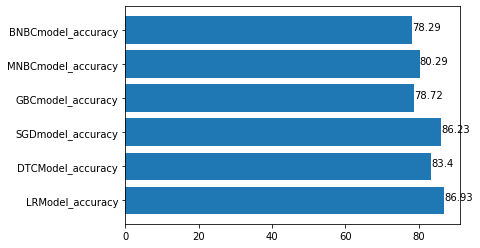

In [38]:
x = ["LRModel_accuracy",
     "DTCModel_accuracy",
     "SGDmodel_accuracy",
     "GBCmodel_accuracy",
     "MNBCmodel_accuracy",
     "BNBCmodel_accuracy"]
y =  [LRModel_accuracy,
     DTCModel_accuracy,
     SGDmodel_accuracy,
     GBCmodel_accuracy,
     MNBCmodel_accuracy,
     BNBCmodel_accuracy]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

In [39]:
# import pickle
# #Serialising the file
# with open('model.pickle', 'wb') as handle:
#     pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [41]:
import joblib  
        
joblib.dump(LRModel, 'LRModel.pkl')
joblib.dump(DTCModel, 'DTCModel.pkl')
joblib.dump(SGDmodel, 'SGDModel.pkl')
joblib.dump(GBCmodel, 'GBCModel.pkl')
joblib.dump(MNBCmodel, 'MNBCModel.pkl')
joblib.dump(BNBCmodel, 'BNBCModel.pkl')

['BNBCModel.pkl']

In [42]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from joblibspark import register_spark
from sklearn.utils import parallel_backend
import numpy as np
import pandas as pd
from pyspark.sql.functions import *
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Fake News Spark") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

# Generate a Pandas DataFrame
pdf = pd.DataFrame(np.random.rand(100, 3))

# Create a Spark DataFrame from a Pandas DataFrame using Arrow
df = spark.createDataFrame(all_data)

print(df.count())



77247


In [54]:
compression_opts = dict(method='zip',
                        archive_name='all_data.csv')  
all_data.to_csv('all_data.zip', index=False,
          compression=compression_opts)